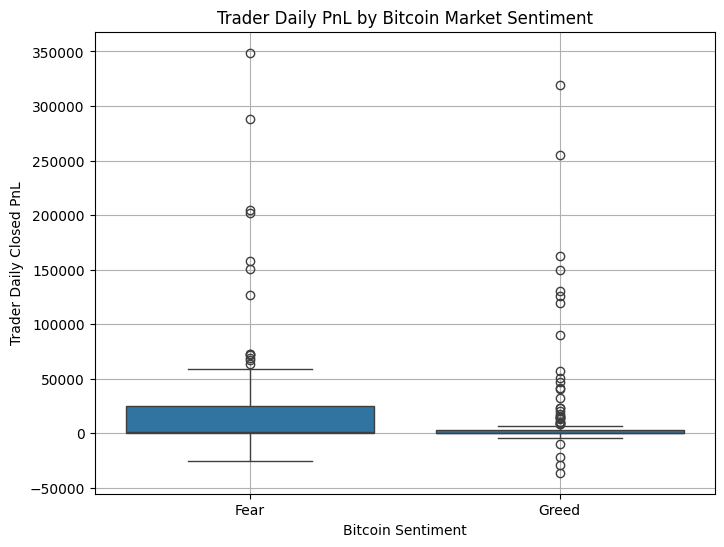


Daily Trader Performance by Sentiment (filtered):
                mean           std  count
Fear   27874.939952  61780.399926     88
Greed  10014.286193  37986.920198    189

Correlation between daily mean PnL and Bitcoin market sentiment: -0.175


In [6]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD DATA
bitcoin_df = pd.read_csv('/content/fear_greed_index.csv')
trader_df = pd.read_csv('/content/historical_data.csv')

# 3. STANDARDIZE COLUMN NAMES
bitcoin_df.columns = bitcoin_df.columns.str.lower()
trader_df.columns = trader_df.columns.str.lower()

# 4. DATE CONVERSION
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date']).dt.date

# trader: column 'timestamp ist' (format: 'DD-MM-YYYY HH:MM')
trader_df['date'] = pd.to_datetime(
    trader_df['timestamp ist'],
    dayfirst=True,
    errors='coerce'
).dt.date

# 5. SENTIMENT MAPPING ('classification' → {Fear:0, Greed:1})
bitcoin_df['sentiment_num'] = bitcoin_df['classification'].map({'Fear': 0, 'Greed': 1})

# 6. AGGREGATE TRADER PERFORMANCE DAILY
daily_trader_perf = trader_df.groupby('date')['closed pnl'].sum().reset_index()

# 7. MERGE SENTIMENT WITH TRADER PERFORMANCE
merged_df = pd.merge(daily_trader_perf, bitcoin_df[['date', 'sentiment_num']], on='date', how='left')

# 8. OUTLIER FILTERING (Optional: For clearer analysis)
q_low  = merged_df['closed pnl'].quantile(0.01)
q_high = merged_df['closed pnl'].quantile(0.99)
filtered_df = merged_df[(merged_df['closed pnl'] > q_low) & (merged_df['closed pnl'] < q_high)]

# 9. BOX PLOT: Trader performance by sentiment
plt.figure(figsize=(8,6))
sns.boxplot(x='sentiment_num', y='closed pnl', data=filtered_df)
plt.xticks([0,1], ['Fear', 'Greed'])
plt.title('Trader Daily PnL by Bitcoin Market Sentiment')
plt.xlabel('Bitcoin Sentiment')
plt.ylabel('Trader Daily Closed PnL')
plt.grid(True)
plt.show()

# 10. SUMMARY STATISTICS
summary = filtered_df.groupby('sentiment_num')['closed pnl'].agg(['mean','std','count'])
summary.index = ['Fear','Greed']
print('\nDaily Trader Performance by Sentiment (filtered):\n', summary)

# 11. CORRELATION
corr = filtered_df['closed pnl'].corr(filtered_df['sentiment_num'])
print('\nCorrelation between daily mean PnL and Bitcoin market sentiment:', round(corr, 3))